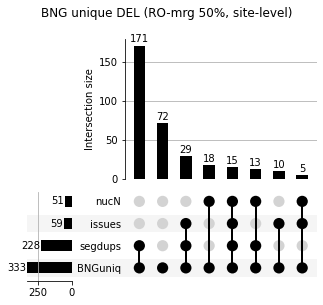

In [3]:
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import upsetplot

folder = '/home/local/work/pipeline/run_folder/output/evaluation/break_analysis/tables'
filename = 'GRCh38_HGSVC2_noalt.BNGuniqDEL-ro50.h5'
bng_set = 'DEL'

map_titles = {
    'BNGuniqSV-ro50': 'BNG unique SV (RO-mrg 50%, site-level)',
    'BNGuniqDEL-ro50': 'BNG unique DEL (RO-mrg 50%, site-level)',
    'BNGuniqINS-ro50': 'BNG unique INS (RO-mrg 50%, site-level)',
}

plot_title = map_titles[filename.split('.')[1]]

bng_file = os.path.join(
    folder,
    filename
)

#print(df.columns)
# select_non_ovl = df.loc[:, ('H64breaks', 'bp', 'coverage')] == 0.

# brk_non_ovl = df.loc[select_non_ovl, :].copy()
# brk_ovl = df.loc[~select_non_ovl, :].copy()

# #print(df.loc[select_non_ovl, ('BNG', 'num', 'samples')].describe())
# #print(df.loc[~select_non_ovl, ('BNG', 'num', 'samples')].describe())

# num_tests = 0
# for c in df.columns:
#     name, unit, statistic = c
#     if unit != 'pct':
#         continue
#     num_tests += 1
#     ks_stat, ks_pv = stats.ks_2samp(
#         brk_non_ovl.loc[:, c].values,
#         brk_ovl.loc[:, c].values,
#         alternative='two-sided'
#     )
#     if ks_pv < 1e-6:
#         print(c, ks_stat, ks_pv)

# print(num_tests)

# # remove by feature
# select_column = [
#     ('nucprof', 'pct', 'nucN'),
#     ('issues', 'pct', 'coverage'),
#     ('H64breaks', 'pct', 'coverage'),
#     ('INVv3', 'pct', 'coverage'),
#     ('segdups', 'pct', 'coverage'),
#     ('SVDROPv3', 'pct', 'coverage'),
# ]

# dropped_indices = []

# sub = df.copy()
# #print('===')
# init_num = sub.shape[0]
# print(init_num)
# total_dropped = 0
# running_num = init_num
# for sc in select_column:
#     drop_rows = sub[sc] > 0.2
#     sub = sub.loc[~drop_rows, :].copy()
#     dropped = running_num - sub.shape[0]
#     total_dropped += dropped
#     remaining = init_num - total_dropped
#     running_num = sub.shape[0]
#     print('dropped: ', sc, dropped)
#     print('remain: ', remaining)

# print(sub.loc[:, ('BNG', 'num', 'samples')].describe())

# #print(sub.loc[sub.loc[:, ('BNG', 'num', 'samples')] > 5, [('BNG', 'category', 'clusterID'), ('BNG', 'category', 'SVtype')]])

# dump_columns = [c for c in sub.columns if 'BNG' in c]

# # dump subset
# subset_file = bng_file.replace('.h5', '.subset-8col.bed')
# sub[dump_columns].to_csv(subset_file, sep='\t', header=True, index=True)

# complete_file = bng_file.replace('.h5', '.full-8col.bed')
# df[dump_columns].to_csv(complete_file, sep='\t', header=True, index=True)

df = pd.read_hdf(bng_file)
df = df.xs(['pct'], level=['unit'], axis=1)

# prepare upsetplot data structure
category_names = ['nucN', 'issues', 'H64break', 'INVv3', 'segdups', 'SVdropV3']
category_names = ['nucN', 'issues', 'segdups']

category_members = dict()
category_members['BNGuniq'] = df.index.get_level_values('name')

for cn in category_names:
    select_columns = [c for c in df.columns if cn in c]
    include_members = (df[select_columns] > 0.2).values
    select_sites = set(df.loc[include_members, :].index.get_level_values('name'))
        
    category_members[cn] = select_sites
    
ups = upsetplot.from_contents(category_members)

upsetplot.plot(ups, sort_by='cardinality', show_counts='%d')
plt.suptitle(plot_title)
out_path = '/home/local/work/data/hgsvc/figSX_panels'
out_file = os.path.join(out_path, 'figSX_BNG-uniq-{}_upset.svg'.format(bng_set))
plt.savefig(out_file)
    

# potentially interesting
# chr5  141163952 141176807 - Variation issue HG-2308
# chr7  158314890 158525431 - alignment issue?
# chr9  110249956 110267906 (!)
# chrX  96056636  96078330 (L1 flanking)    
